In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
# чтение данных
data = pd.read_json("data.json")

In [3]:
# посмотрим первые 10 записей
data.head(10)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [25]:
# Преобразуем данные ingredients - добавим колонки, содержащие информацию о наличии ингредиента (колонок будет столько же, сколько ингредиентов в целом; в колонке будет стоять 1, если ингредиент есть в блюде, 0 - если нет)
ingredients_array = []
N = len(data)
for i in range(N):
    ingredients_array+=data.ingredients.iloc[i]
ingredients_array = list(set(ingredients_array))
for x in ingredients_array:
    data[x] = np.array([0]*N, dtype='uint8')


In [26]:
data.head(10)

,id,cuisine,ingredients,dried cloud ears,low-fat vegetable primavera spaghetti sauce,espresso,navel oranges,yellowtail snapper fillets,cracker crumbs,nectarines,...,dandelion greens,chocolate ice cream,plain chocolate,miso sesame grilling sauce,fresh tofu,medium zucchini,gai lan,yellow corn meal,sourdough loaf,franks
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import warnings
warnings.filterwarnings("ignore")
for i in tqdm(range(N)):
    ingredients_value = data.ingredients.iloc[i]
    data[ingredients_value].iloc[i] = np.array([1]*len(ingredients_value))
        

100%|██████████| 39774/39774 [05:23<00:00, 123.12it/s]


In [11]:
data.head(10)

,id,cuisine,ingredients,low-fat pasta sauce,lean bacon,black moss,double-acting baking powder,maltose,reduced sodium beef stock,america,...,cola,granulated tapioca,chicken flavored rice,pastry dough,sausages,sea bass,lower sodium beef broth,sweet red bean paste,lotus seeds,sea scallops
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cuisine = pd.DataFrame(data.cuisine)
cuisine["count"] = [1]*len(cuisine)

In [5]:
# cuisine


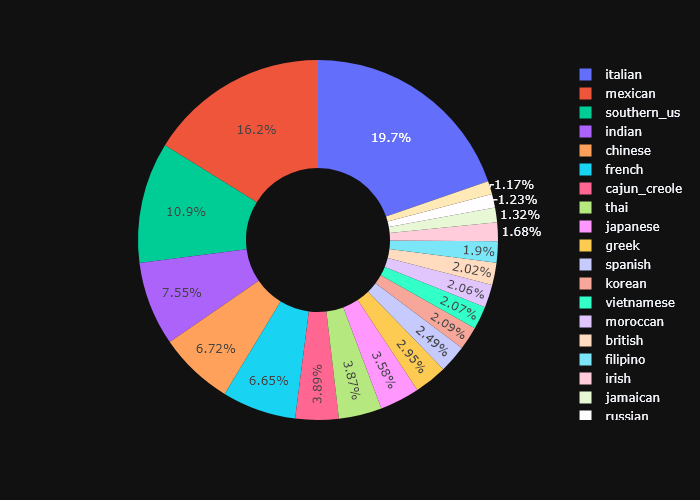

In [7]:
# посмотрим на распределение кухонь мира - проверим, сбалансированная ли выборка

import plotly.express as px

fig = px.pie(cuisine, values = "count", names="cuisine",  hole=.4)
fig.show()

# можно видеть, что выборка не очень сбалансирована, что, скорее всего, помешает сделать неплохими некоторые метрики в результате обучения (например, чувствительность и специфичность)

In [27]:
data.head(10)

,id,cuisine,ingredients,dried cloud ears,low-fat vegetable primavera spaghetti sauce,espresso,navel oranges,yellowtail snapper fillets,cracker crumbs,nectarines,...,dandelion greens,chocolate ice cream,plain chocolate,miso sesame grilling sauce,fresh tofu,medium zucchini,gai lan,yellow corn meal,sourdough loaf,franks
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Dict_cuisine = {}
for i in range(500):
    cuisine = data.cuisine.iloc[i]
    if cuisine not in Dict_cuisine:
        Dict_cuisine[cuisine]= data.ingredients.iloc[i]
    else:
        Dict_cuisine[cuisine]+= data.ingredients.iloc[i]
        
# Dict_cuisine  


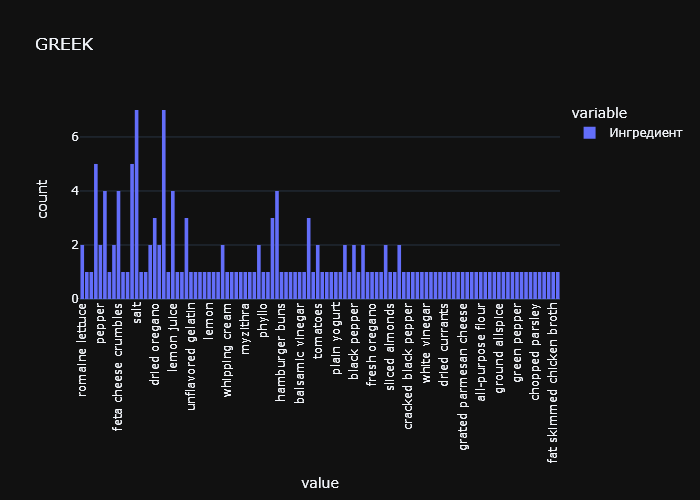

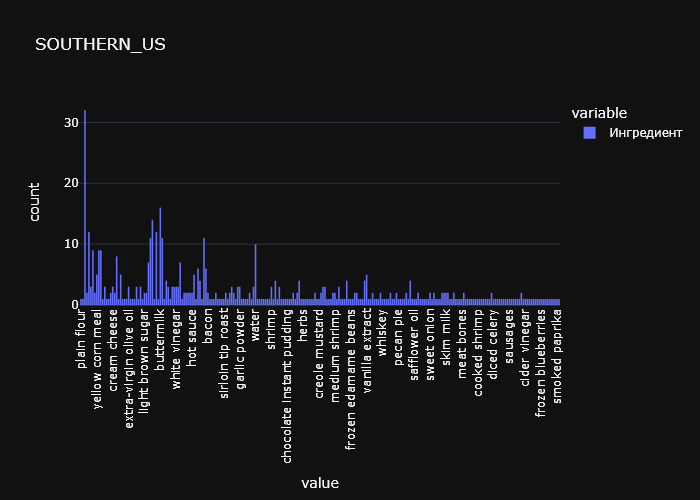

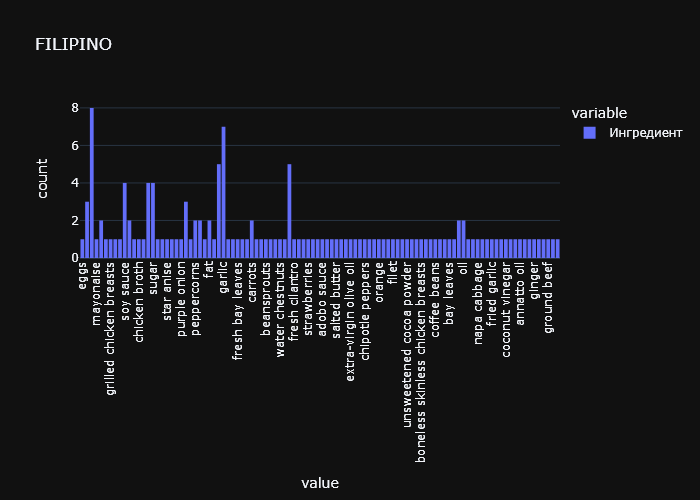

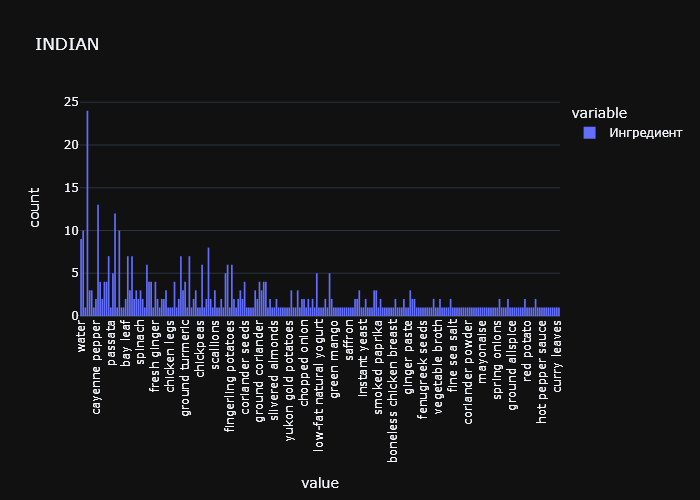

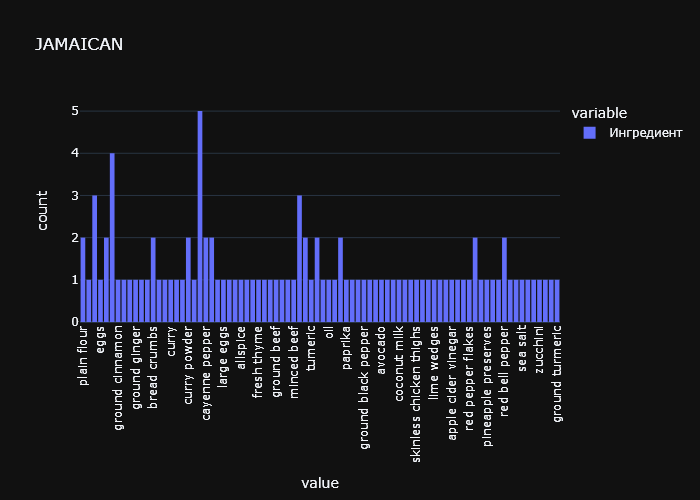

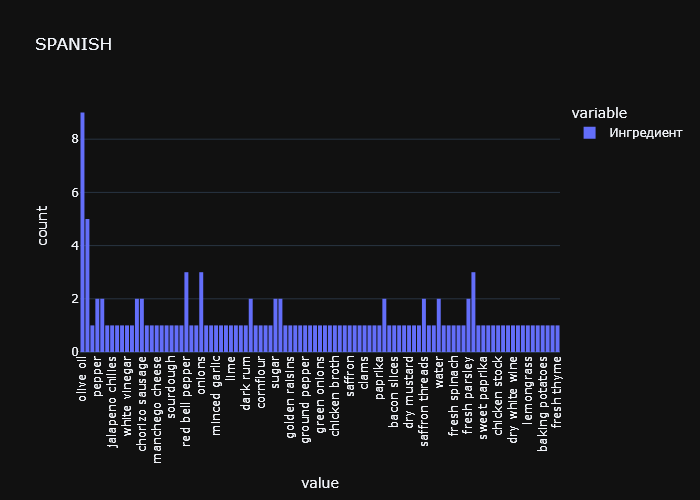

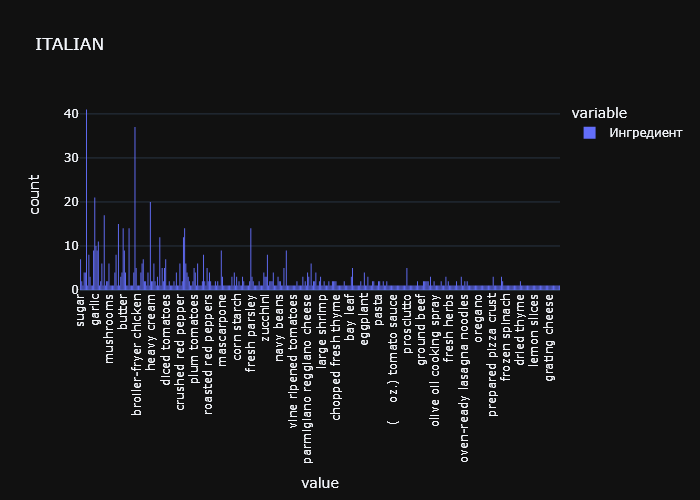

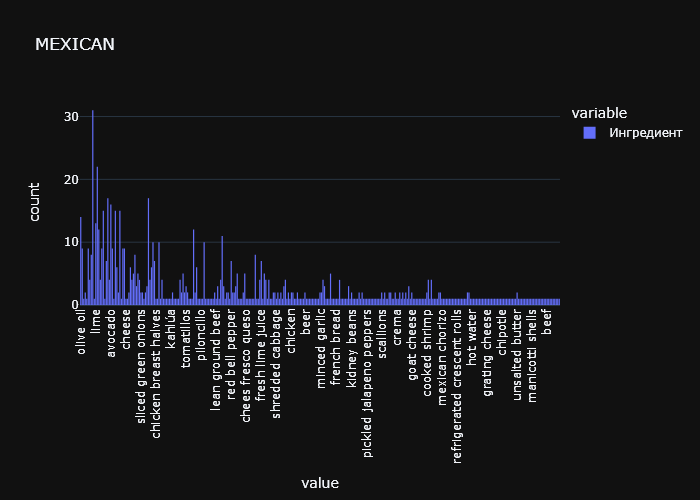

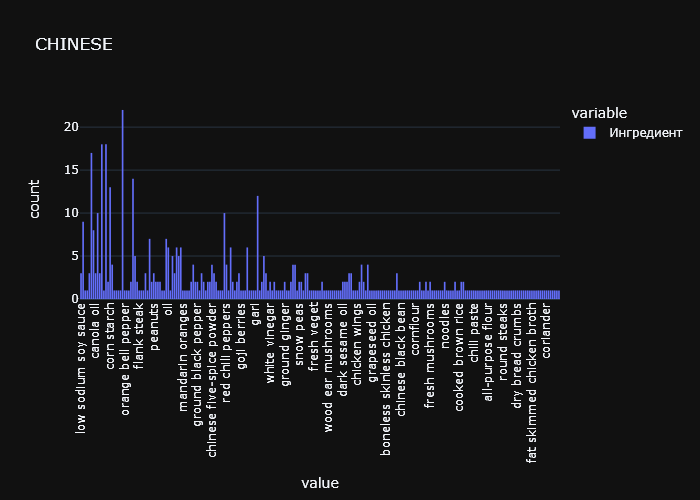

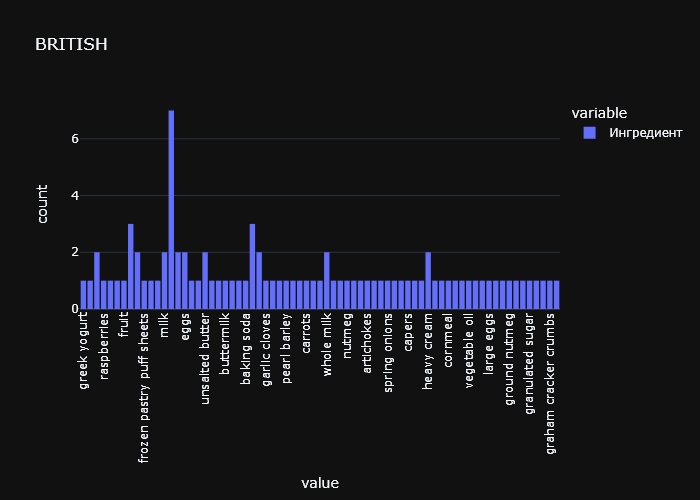

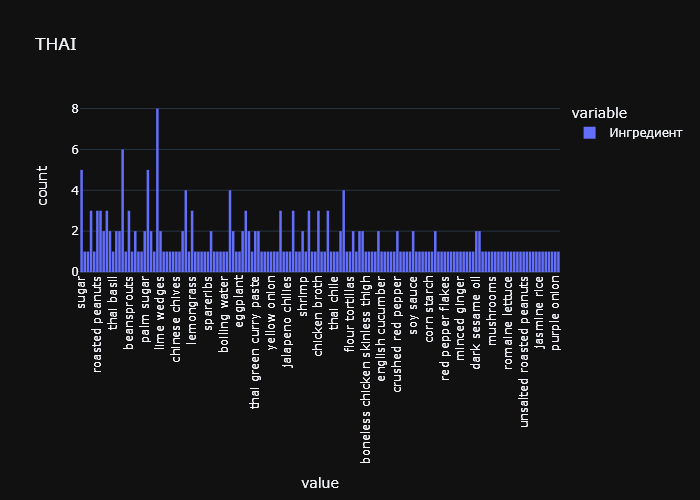

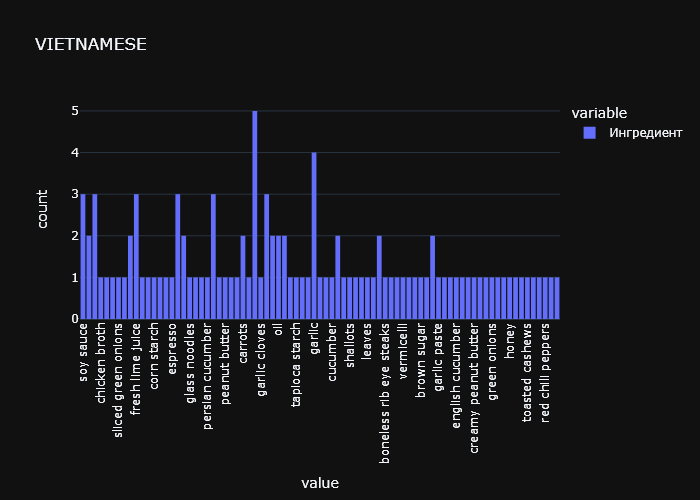

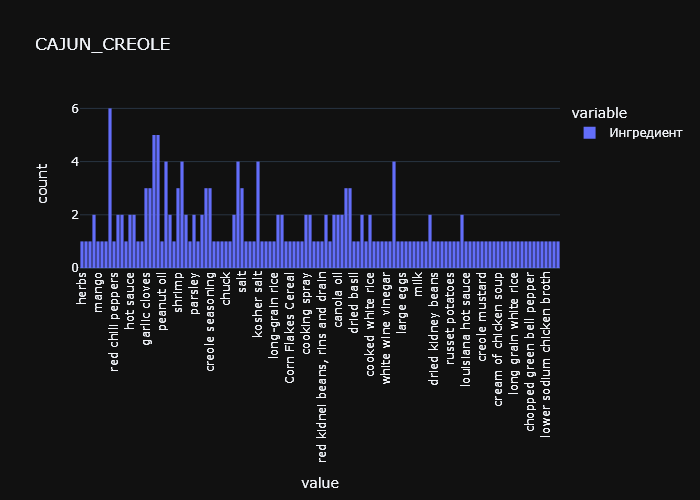

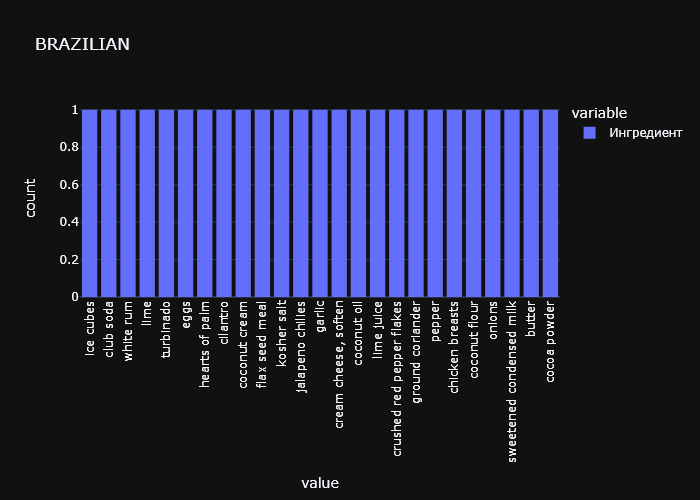

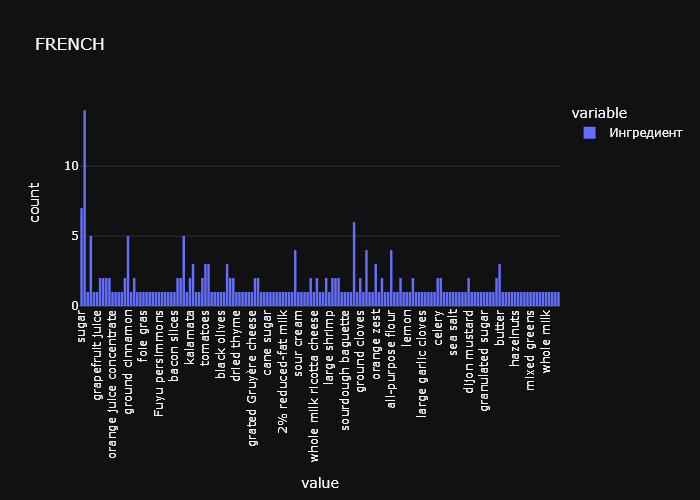

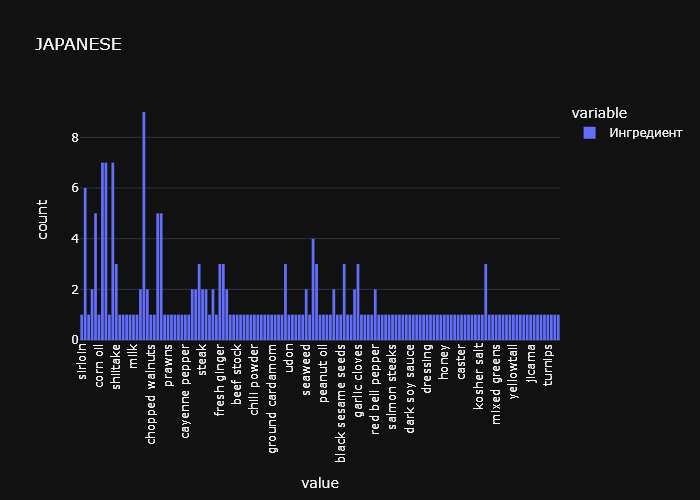

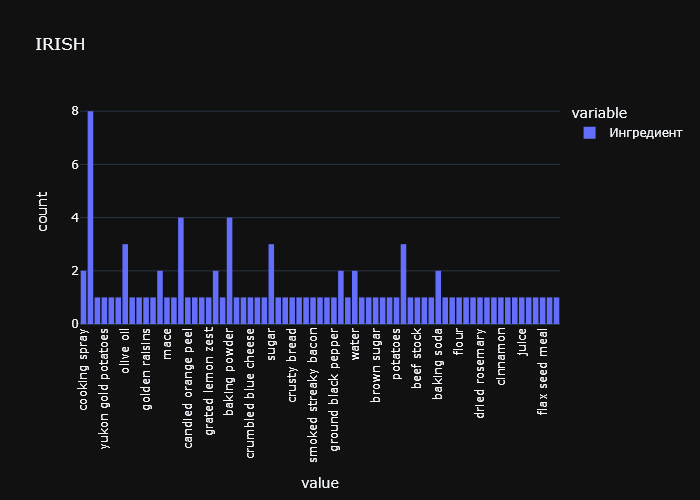

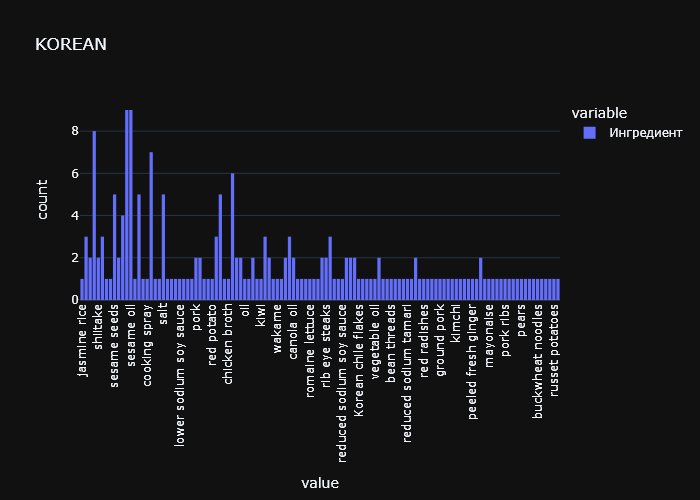

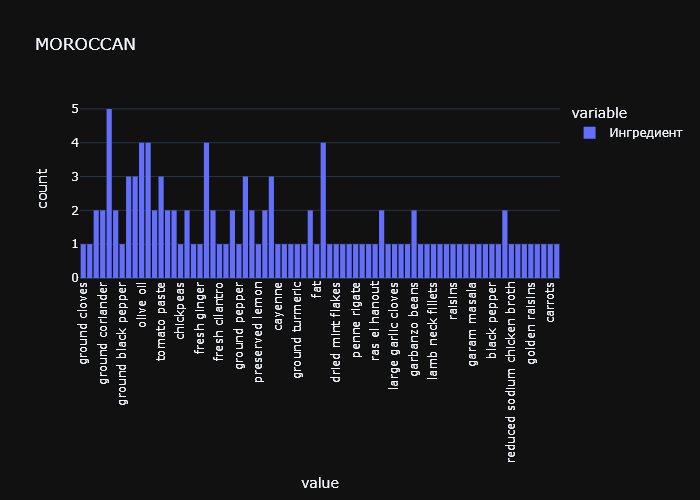

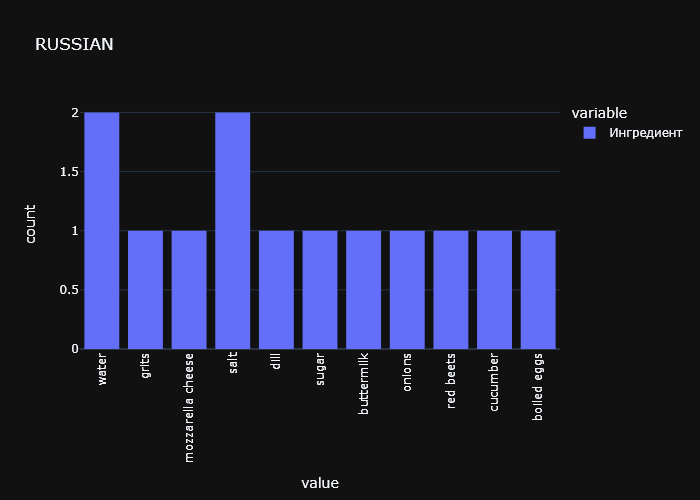

In [9]:

for element in Dict_cuisine:
    fig = px.histogram(pd.DataFrame(Dict_cuisine[element], columns=["Ингредиент"]), title=element.upper())
    fig.update_xaxes(tickangle= -90)
    fig.show()    